1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.


Расчет с использованием intercept

In [22]:
import numpy as np
X_zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
Y_ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(Y_ks)
n

10

In [7]:
b = (np.mean(X_zp * Y_ks)- np.mean(X_zp)*np.mean(Y_ks))/(np.mean(X_zp**2) - np.mean(X_zp)**2)
b

2.620538882402765

In [9]:
b_2 = (n * (np.sum(X_zp * Y_ks)) - (np.sum(Y_ks) * np.sum(X_zp))) /( n * (np.sum(X_zp**2)) - ((np.sum(X_zp)**2)))
b_2

2.6205388824027653

In [10]:
a = np.mean(Y_ks) - b * np.mean(X_zp)
a

444.1773573243596

In [14]:
y_hat = a + b*X_zp
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

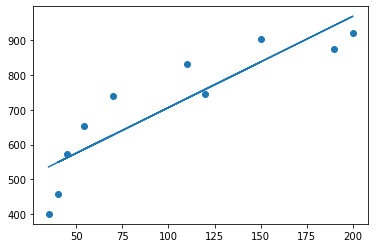

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X_zp, Y_ks)
plt.plot (X_zp, y_hat)
plt.show()

In [97]:
print(f"y = {a} + {b}*x")

y = 444.1773573243596 + 2.620538882402765*x


Расчет без использования intercept. Матричный метод

In [23]:
import seaborn as sns

In [24]:
X = X_zp.reshape((n,1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [25]:
Y = Y_ks.reshape((n,1))
Y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [27]:
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@Y)
B

array([[5.88982042]])

In [91]:
Y_hat = B*X
Y_hat

array([[ 206.1437147 ],
       [ 265.04191891],
       [1119.06587983],
       [1177.96408403],
       [ 235.59281681],
       [ 412.28742941],
       [ 318.05030269],
       [ 883.47306302],
       [ 706.77845042],
       [ 647.88024621]])

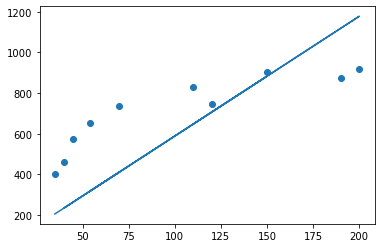

In [57]:
plt.scatter(X_zp, Y_ks)
plt.plot (X_zp, Y_hat)
plt.show()

In [99]:
print(f"y = 5.88982042 * x")

y = 5.88982042 * x


2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).


In [42]:
def mse_(B1, y=Y_ks, X=X_zp, n=10):
    return np.sum((B1*X-y)**2)/n

In [106]:
alpha = 1e-6
alpha

1e-06

In [107]:
B1 = 0.1

In [108]:
for i in range (2000):
    B1 -= alpha * (2/n) * np.sum((B1*X_zp-Y_ks)*X_zp)
    if i%200==0:
        print(f"Iteration: {i}, B1 = {B1}, mse= {mse_(B1)}")

Iteration: 0, B1 = 0.25952808, mse= 493237.7212546963
Iteration: 200, B1 = 5.868748638669329, mse= 56522.97550129376
Iteration: 400, B1 = 5.8897415574471985, mse= 56516.85850140053
Iteration: 600, B1 = 5.889820124983314, mse= 56516.85841572062
Iteration: 800, B1 = 5.88982041902807, mse= 56516.8584157194
Iteration: 1000, B1 = 5.8898204201285544, mse= 56516.85841571941
Iteration: 1200, B1 = 5.889820420132673, mse= 56516.85841571943
Iteration: 1400, B1 = 5.889820420132673, mse= 56516.85841571943
Iteration: 1600, B1 = 5.889820420132673, mse= 56516.85841571943
Iteration: 1800, B1 = 5.889820420132673, mse= 56516.85841571943


In [62]:
B1 = 5.889820420132673
B1

5.889820420132673

3. (необязательная)Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [117]:
def mse_(B0, B1, y=Y_ks, X=X_zp, n=10):
    return np.sum((B0 + B1*X-y)**2)/n

In [142]:
alpha = 1e-5
alpha

1e-05

In [143]:
B0 = 0.1
B1 = 0.1

In [150]:
for i in range (700000):
    B0 -= alpha * (2/n) * np.sum(B0 + B1*X_zp-Y_ks)
    B1 -= alpha * (2/n) * np.sum((B0 + B1*X_zp-Y_ks)*X_zp)
    if i%100000==0:
        print(f"Iteration: {i},B0 = {B0}, B1 = {B1}, mse= {mse_(B0, B1)}")

Iteration: 0,B0 = 444.1773429875889, B1 = 2.620538987927201, mse= 6470.41420117671
Iteration: 100000,B0 = 444.17734869201206, B1 = 2.620538945940337, mse= 6470.41420117668
Iteration: 200000,B0 = 444.1773521267149, B1 = 2.620538920659535, mse= 6470.414201176664
Iteration: 300000,B0 = 444.1773541947931, B1 = 2.6205389054376407, mse= 6470.4142011766635
Iteration: 400000,B0 = 444.1773554400053, B1 = 2.620538896272376, mse= 6470.414201176659
Iteration: 500000,B0 = 444.1773561897637, B1 = 2.6205388907538505, mse= 6470.414201176661
Iteration: 600000,B0 = 444.17735664119317, B1 = 2.6205388874311466, mse= 6470.414201176658


In [154]:
print(f"B0 = 444.1774 \nB1 = 2.62054")

B0 = 444.1774 
B1 = 2.62054
